# Programming Assignment 2 (Binary classification using Logistic Regression and Decision Tree)
**Dataset:** `Admit.csv` (GRE, GPA, Rank, Admit)

This notebook follows the assignment spec:
- EDA (20%)
- Logistic Regression **from scratch** (20%)
- Logistic Regression with scikit-learn + comparison (20%)
- Decision Tree with scikit-learn + visualization (20%)
- Graphs, visualizations and conclusions 20%


## 1) Set up & imports

In [164]:
# setup & imports 
# please run this part before you proceed further
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree


## 2) Load Data

In [165]:
# load data ===
# make sure that Admit.csv is in the same folder as this notebook
df = pd.read_csv('Admit.csv')
print(df.head())
print(df.info())
print(df.describe(include='all'))
print("It looks like there is no missing data, so we are good to onto the next step")


   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000

## 3) Exploratory Data Analysis (EDA)

Number of elements between admits and non-admits:
admit
0    273
1    127
Name: count, dtype: int64
Number of elements between admits and non-admits (normalized):
admit
0    0.6825
1    0.3175
Name: proportion, dtype: float64


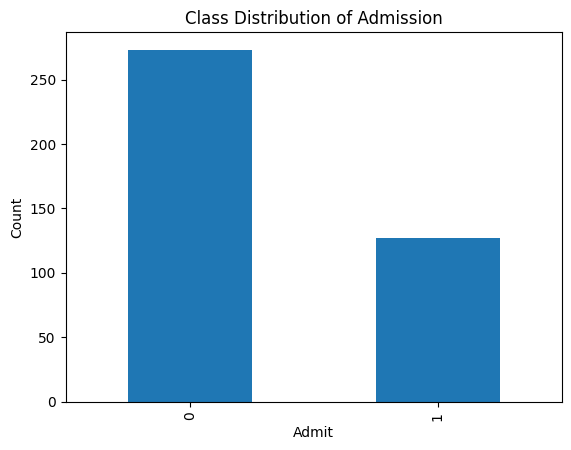

From this data above, we can see that the data is slightly imbalance with the scale 68-31 but it is still fine.


In [ ]:
#checking for balance
print("Number of elements between admits and non-admits:")
print(df['admit'].value_counts())

print("Number of elements between admits and non-admits (normalized):")
print(df['admit'].value_counts(normalize=True))

df['admit'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Admission')
plt.xlabel('Admit')
plt.ylabel('Count')
plt.show()

print('From this data above, we can see that the data is slightly imbalance with the scale 68-31 but it is still fine.')

## 4) Custom Logistic Regression 

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.1, max_iter=1, verbose=False):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.verbose = verbose
        self.w = None
        self.b = 0.0

    def update_weight_with_gradient_ascent(self, X, grad_w, grad_b):
        self.w += self.learning_rate * grad_w
        self.b += self.learning_rate * grad_b

    def calculate_gradient_from_logistic_regression_derivative(self, X, y, p, n):
        grad_w = X.T @ (y - p) / n
        grad_b = np.sum(y - p) / n 

        return grad_w, grad_b

    def train(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d, dtype=float)
        self.b = 0.0

        for it in range(self.max_iter):
            z = X @ self.w + (self.b)
            p = sigmoid(z)

            grad_w, grad_b = self.calculate_gradient_from_logistic_regression_derivative(X, y, p, n)
            
            self.update_weight_with_gradient_ascent(X, grad_w, grad_b)

        return self

    def predict_probability(self, X):
        z = X @ self.w + (self.b)
        return sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_probability(X) >= threshold).astype(int)

def train_and_evaluate_custom_lr(X, y, features_name, learning_rate=0.1, max_iter=1000, test_size=0.25, random_state=42, verbose=True):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = CustomLogisticRegression(learning_rate=learning_rate, max_iter=max_iter, verbose=verbose)
    model.train(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    print(f"Custom Logistic Regression ({max_iter} iterations) {features_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1:", f1_score(y_test, y_pred, zero_division=0))
    print()
    
    return y_pred, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled


#train with rank feature
X_with_rank = df[['gre', 'gpa', 'rank']]
y_with_rank = df['admit']

y_pred_with_rank, X_train_with_rank, X_test_with_rank, y_train_with_rank, y_test_with_rank, X_train_scaled_with_rank, X_test_scaled_with_rank = train_and_evaluate_custom_lr(
    X_with_rank, y_with_rank, 
    features_name="with rank",
    learning_rate=0.1, 
    max_iter=1000
)

#train without rank feature
X = df[['gre', 'gpa']]
y = df['admit']

y_pred_1000, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = train_and_evaluate_custom_lr(
    X, y,
    features_name="",
    learning_rate=0.1,
    max_iter=1000
)

#train with more iterations
y_pred_10000, _, _, _, _, _, _ = train_and_evaluate_custom_lr(
    X, y,
    features_name="",
    learning_rate=0.1,
    max_iter=10000
)



Custom Logistic Regression (1000 iterations) with rank:
Accuracy: 0.69
Precision: 0.5714285714285714
Recall: 0.125
F1: 0.20512820512820512

Custom Logistic Regression (1000 iterations) :
Accuracy: 0.66
Precision: 0.25
Recall: 0.03125
F1: 0.05555555555555555

Custom Logistic Regression (10000 iterations) :
Accuracy: 0.66
Precision: 0.25
Recall: 0.03125
F1: 0.05555555555555555



## 7) Sklearn Logistic Regression

In [168]:
def sklearn_logistic_regression(X_train, y_train, X_test, y_test, model_name="Logistic Regression", max_iter=1000, solver='lbfgs'):
    lr = LogisticRegression(max_iter=max_iter, solver=solver)  # Use keyword arguments
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(model_name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1:", f1_score(y_test, y_pred, zero_division=0))
    return y_pred


y_pred_lr_with_rank = sklearn_logistic_regression(X_train_scaled_with_rank , y_train_with_rank, X_test_scaled_with_rank, y_test_with_rank, model_name="Sklearn Logistic Regression with rank:", max_iter=1000, solver='lbfgs')
y_pred_lr = sklearn_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test, model_name="Sklearn Logistic Regression:", max_iter=1000, solver='lbfgs')

print("From this we can see that the results are exactly the same as custom logistic regression")

Sklearn Logistic Regression with rank:
Accuracy: 0.69
Precision: 0.5714285714285714
Recall: 0.125
F1: 0.20512820512820512
Sklearn Logistic Regression:
Accuracy: 0.66
Precision: 0.25
Recall: 0.03125
F1: 0.05555555555555555
From this we can see that the results are exactly the same as custom logistic regression


## 8) Decision Tree + Visualization

Decision Tree (max_depth=3):
Accuracy: 0.74
Precision: 0.875
Recall: 0.21875
F1: 0.35



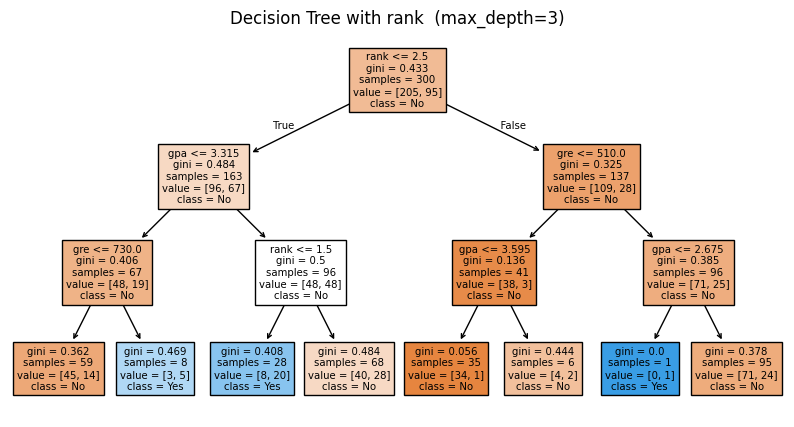

Decision Tree (max_depth=1000):
Accuracy: 0.65
Precision: 0.45454545454545453
Recall: 0.46875
F1: 0.46153846153846156



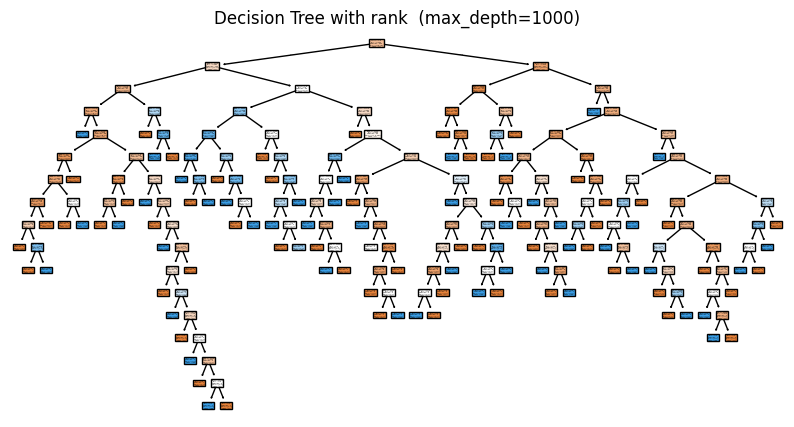

Decision Tree (max_depth=3):
Accuracy: 0.72
Precision: 0.8333333333333334
Recall: 0.15625
F1: 0.2631578947368421



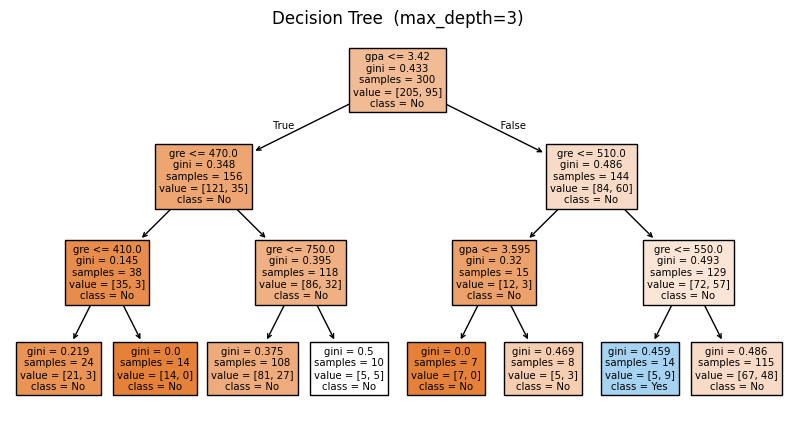

Decision Tree (max_depth=1000):
Accuracy: 0.64
Precision: 0.43333333333333335
Recall: 0.40625
F1: 0.41935483870967744



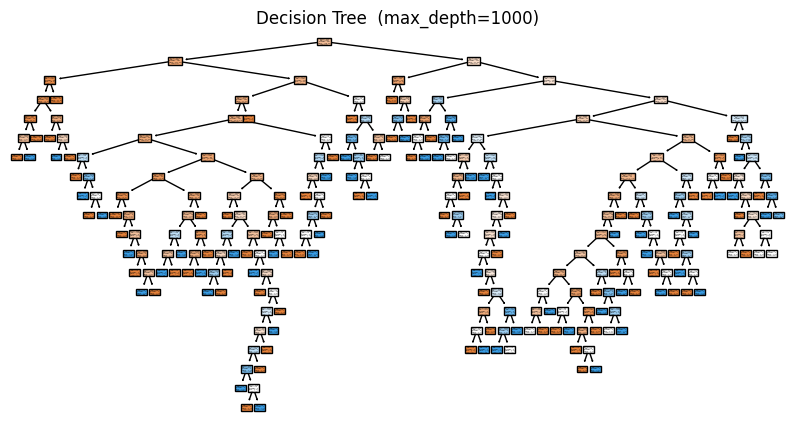

In [ ]:
def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth=3, random_state=42, plot_tree_viz=True, figsize=(10, 5), class_names=['No', 'Yes'],model_name = "Decision Tree "):

    tree = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    y_pred = tree.predict(X_test)
    
    print(f"Decision Tree (max_depth={max_depth}):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1:", f1_score(y_test, y_pred, zero_division=0))
    print()
    
    if plot_tree_viz:
        plt.figure(figsize=figsize)
        plot_tree(tree, feature_names=X_train.columns, class_names=class_names, filled=True)
        plt.title(f"{model_name} (max_depth={max_depth})")
        plt.show()
    
    return tree, y_pred


#train with rank feature
tree_with_rank_3, y_pred_tree_with_rank_3 = train_and_evaluate_decision_tree(
    X_train_with_rank, y_train_with_rank, X_test_with_rank, y_test_with_rank, 
    max_depth=3, model_name="Decision Tree with rank "
)

tree_with_rank_1000, y_pred_tree_with_rank_1000 = train_and_evaluate_decision_tree(
    X_train_with_rank, y_train_with_rank, X_test_with_rank, y_test_with_rank, 
    max_depth=1000, model_name="Decision Tree with rank "
)

#train without rank feature
tree_3, y_pred_tree_3 = train_and_evaluate_decision_tree(
    X_train, y_train, X_test, y_test, 
    max_depth=3
)

tree_1000, y_pred_tree_1000 = train_and_evaluate_decision_tree(
    X_train, y_train, X_test, y_test, 
    max_depth=1000
)

## 9) Discussion / Conclusions

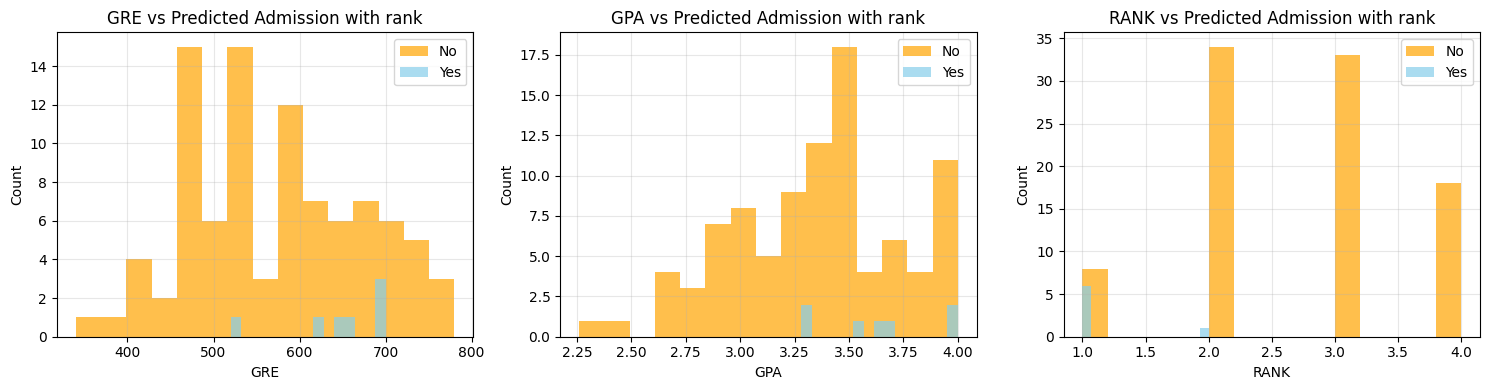

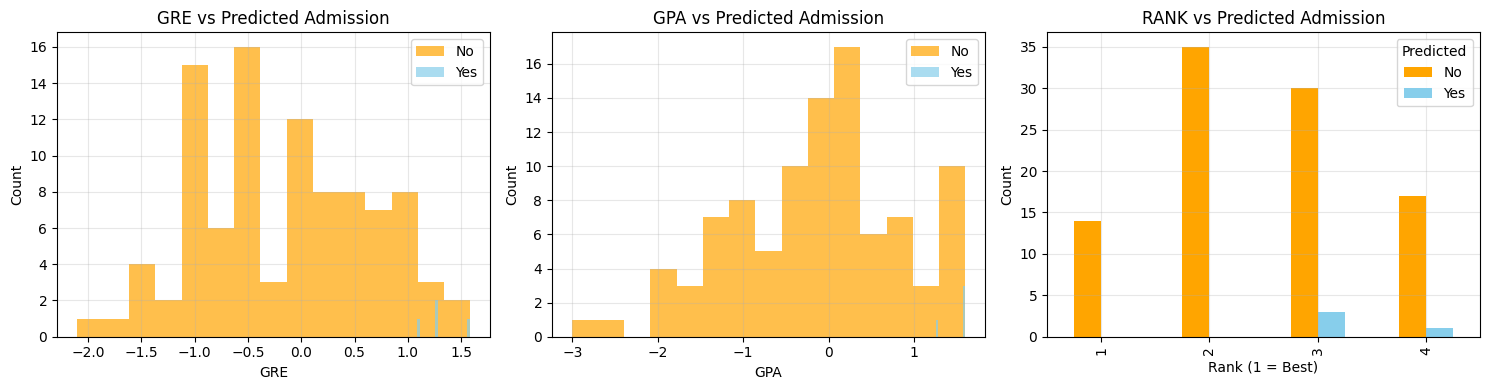


From the results, it looks like adding rank as an input makes the F1 score go up, 
so it seems like the model gets better. But I don’t think that’s really true.

If we look at the histogram, we can see that students with lower rank
get admitted more often, while those with higher rank don’t get admitted. 
That doesn’t make any sense.

I think it is becase the data is imbalanced (around 68% not admitted and 32% admitted), 
the model mostly predicts “not admitted,” which makes it unreliable. 
Even if the numbers look okay, the result is not very believable.

To make it better, we should collect more samples or add other useful features 
like essay score, TOEFL, or subject test results. 
Rank could help, but only if we understand clearly what it means and how it was measured. 
The higher F1 score in the decision tree likely happens because the data 
has some small correlations (rank is affected by GRE and GPA).



In [172]:
features = ['gre', 'gpa', 'rank']

results_df = X_test_with_rank.copy()  # This one still has 'rank'
results_df['Predicted'] = y_pred_with_rank
results_df['Predicted_Label'] = results_df['Predicted'].map({0: 'No', 1: 'Yes'})

# Define features to visualize (including rank, even if not used in model)
features = ['gre', 'gpa', 'rank']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    for label, color in zip(['No', 'Yes'], ['orange', 'skyblue']):
        subset = results_df[results_df['Predicted_Label'] == label]
        plt.hist(subset[feature], bins=15, alpha=0.7, color=color, label=label)
    plt.title(f"{feature.upper()} vs Predicted Admission with rank")
    plt.xlabel(feature.upper())
    plt.ylabel("Count")
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# We can do this because X_test still corresponds to rows in df (same indices)
rank_test = df.loc[X_test.index, 'rank']

# Combine scaled test set, predictions, and rank
results_df = pd.DataFrame(X_test_scaled, columns=['gre', 'gpa'])
results_df['Predicted'] = y_pred
results_df['Predicted_Label'] = results_df['Predicted'].map({0: 'No', 1: 'Yes'})
results_df['rank'] = rank_test.values

# === Plot histograms for GRE, GPA, and a bar chart for Rank ===
features = ['gre', 'gpa', 'rank']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    if feature == 'rank':
        # Rank is discrete, so use a bar plot
        counts = results_df.groupby(['rank', 'Predicted_Label']).size().unstack(fill_value=0)
        counts.plot(kind='bar', stacked=False, color=['orange', 'skyblue'], ax=plt.gca())
        plt.title("RANK vs Predicted Admission")
        plt.xlabel("Rank (1 = Best)")
        plt.ylabel("Count")
        plt.legend(title="Predicted")
    else:
        for label, color in zip(['No', 'Yes'], ['orange', 'skyblue']):
            subset = results_df[results_df['Predicted_Label'] == label]
            plt.hist(subset[feature], bins=15, alpha=0.7, color=color, label=label)
        plt.title(f"{feature.upper()} vs Predicted Admission")
        plt.xlabel(feature.upper())
        plt.ylabel("Count")
        plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

conclusion = """
From the results, it looks like adding rank as an input makes the F1 score go up, 
so it seems like the model gets better. But I don’t think that’s really true.

If we look at the histogram, we can see that students with lower rank
get admitted more often, while those with higher rank don’t get admitted. 
That doesn’t make any sense.

I think it is becase the data is imbalanced (around 68% not admitted and 32% admitted), 
the model mostly predicts “not admitted,” which makes it unreliable. 
Even if the numbers look okay, the result is not very believable.

To make it better, we should collect more samples or add other useful features 
like essay score, TOEFL, or subject test results. 
Rank could help, but only if we understand clearly what it means and how it was measured. 
The higher F1 score in the decision tree likely happens because the data 
has some small correlations (rank is affected by GRE and GPA).
"""


print(conclusion)
